In [1]:
#Python snapshot




#installer with capacity 



import simple_model as sm 








In [2]:
res = sm.Test.run_test(7)

In [3]:
print(res)

12


In [4]:
res = sm.Test.run_dynamic_test(7)

In [5]:
print(res)

13


In [6]:
def dynamic_test(value):
    return value + 8

In [7]:
test = sm.Test()
test.dynamic_method = dynamic_test

In [8]:
test.dynamic_method(7)

15

In [2]:
#initialize model 
model = sm.Model()

model.tearup_model()



In [ ]:
sm.

In [3]:
for i in range(5):
    model = sm.Model()
    model.tearup_model()
    model.seis[0].price_per_watt = 3.5 - i * 0.2
    model.run_model()
    print(model.seis[0].price_per_watt)
    print(len(model.systems))

3.5
12
3.3
14
3.1
16
2.9
17
2.7
23


In [12]:
test_y = []
test_x = []
for i in range(10):
    model = sm.Model()
    model.tearup_model()
    model.seis[0].price_per_watt = 4.0 - i * 0.2
    model.run_model()
    print(model.seis[0].price_per_watt)
    print(len(model.systems))
    test_y.append(len(model.systems))
    test_x.append(model.seis[0].price_per_watt)

4.0
3
3.8
8
3.6
8
3.4
12
3.2
17
3.0
11
2.8
19
2.5999999999999996
21
2.4
21
2.2
22


In [15]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
matplotlib.style.use('ggplot')
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch

In [16]:
colors_ = ['orange', 'olive', 'khaki'] 

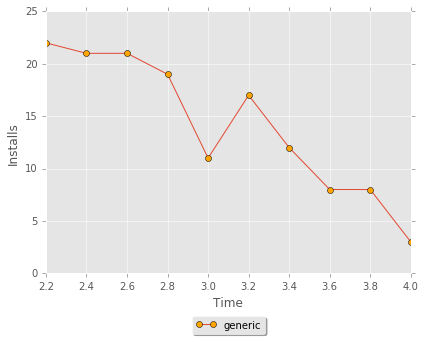

In [17]:
data_mode = 'pm_'
test_mode = 'inst'
fig, axes_ = plt.subplots(nrows=1, ncols=1)
fig.subplots_adjust(bottom=0.25)

#if ncols = 1  - transform into list
axes = [axes_]

ind = test_x    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence



lines = []

markers = ["o-", "^-", "*-"]
markerfacecolors = colors_
colors = ['r', 'r', 'r']
labels = ['generic', 'none']

for i in range(1) :
    pi, = axes[0].plot(ind, test_y, markers[i], label=labels[i])
    pi.set_markerfacecolor(markerfacecolors[i])
    lines.append(pi)
    

axes[0].set_xlabel("Price per watt")
axes[0].set_ylabel("Installs")
    
# Shrink current axis's height by 10% on the bottom
box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0 + box.height * 0.2,
                 box.width, box.height * 0.8])

# Put a legend below current axis
lgd = axes[0].legend(lines, [l.get_label() for l in lines], loc='lower center', bbox_to_anchor=(0.5, -0.25),\
          fancybox=True, shadow=True, fontsize='10', ncol = 2)




plt.tight_layout()
plt.savefig('Simulation_results_' + data_mode + test_mode +  '.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


In [3]:
len(model.hs)

100

In [4]:
model.hs[0].roof_size

260.09249999999997

In [5]:
res, system = model.seis[0].offer_system(model.hs[40])

In [6]:
print(system)

In [15]:
system

In [7]:
system.failure_rate

0.1929780905602079

In [8]:
system.total_costs

57484.385694729637

In [9]:
system.demand

52.557152635181382

In [10]:
system.total_net_savings

0.030957703859370696

In [ ]:
    def savings_system(self, system):
        inflation = sm.settings.inflation
        CPI = 1.0
        AC_size_t = system.dc_size * sm.settings.dc_to_ac/1000
            
        degradation_t = system.pvpanel.degradation
        production_t = 0.0
    
        consumption_t = system.demand * NUMBER_DAYS_IN_YEAR

        loan_amount = system.total_costs * (1 - settings.tax_incentive)
        interest_rate_loan = sm.settings.interest_rate
        warranty_length = 25
        
        loan_length = warranty_length
    
        NUMBER_MONTHS_IN_YEAR = 12
        N_loan = loan_length * NUMBER_MONTHS_IN_YEAR
        loan_annuity = (interest_rate_loan/NUMBER_MONTHS_IN_YEAR)/(1 - math.pow((1 + interest_rate_loan/NUMBER_MONTHS_IN_YEAR), - N_loan))*loan_amount
        total_production = 0.0
        potential_energy_costs = 0.0
        realized_energy_income = 0.0

        for i in range(warranty_length):
            production_t = AC_size_t * settings.solar_irradiation * NUMBER_DAYS_IN_YEAR
            total_production += production_t
            potential_energy_costs += consumption_t * CPI * settings.p_electricity_d
#            print(potential_energy_costs)
            realized_energy_income += production_t * CPI * settings.p_electricity_s
#            print(realized_energy_income)
            AC_size_t = AC_size_t * degradation_t
#           print(AC_size_t)
            CPI = CPI * (1 + inflation)

        system.total_net_savings = (realized_energy_income - loan_annuity * N_loan)/potential_energy_costs
    

        system.co2_equivalent = total_production/warranty_length * settings.EnergyToCO2/1000

In [11]:

#run model
model.run_model()

In [13]:
param_ = 'EParamTypes::HOSEIDecisionEstimatedNetSavings'
print(sm.tools.HO_coefs['type1'][param_])
print(sm.tools.HO_x_i['type1'][param_])

[[-1.7616, -0.4596, 0.2628, 0.4545], [9.360166666666668, 7.3196666666666665, 1.8491666666666648, 3.56566666666667], [0.0, -13.603333333333333, -22.866666666666667, 34.31000000000004], [-30.229629629629635, -20.585185185185182, 127.05925925925932, -76.24444444444457]]
[0.1, 0.25, 0.4, 0.55, 0.7]


In [14]:
print(sm.settings.THETA_SEI)

{'EParamTypes::HOSEIDecisionUtilityNone': [0.0284], 'EParamTypes::HOSEIDecisionTotalProjectTime': [0.1916, 0.1948, -0.0666, -0.3198], 'EParamTypes::SEIWarranty': [-0.9026, 0.1318, 0.7708], 'EParamTypes::SEIEquipmentType': [0.1425, -0.0217, -0.1208], 'EParamTypes::HOSEIDecisionEstimatedNetSavings': [-1.7616, -0.4596, 0.2628, 0.4545, 1.504], 'EParamTypes::SEIRating': [-0.8471, 0.1073, 0.7398], 'EParamTypes::SEIInteractionType': [-0.1313, 0.0571, 0.0742]}


In [13]:
param_ = 'EParamTypes::HOSEIDecisionTotalProjectTime'
label_i = 'type1'
x_i = 2
x_i_min = [n for n in sm.tools.HO_x_i[label_i][param_] if n < x_i]

In [14]:
import bisect

In [15]:
x_i_min = bisect.bisect_left(sm.tools.HO_x_i[label_i][param_], x_i)

In [20]:
idx = max(x_i_min - 1, 0)

In [21]:
print(x_i_min)

2


In [22]:
print(idx)

1


In [24]:
h = x_i - sm.tools.HO_x_i[label_i][param_][idx]
print(h)

1


In [13]:
print(sm.tools.HO_x_i)

{'type1': {'EParamTypes::HOSEIDecisionEstimatedNetSavings': [0.1, 0.25, 0.4, 0.55, 0.7], 'EParamTypes::HODesignDecisionEstimatedNetSavings': [0.1, 0.25, 0.4, 0.55, 0.7], 'EParamTypes::HODesignDecisionCO2': [3, 6, 9], 'EParamTypes::HOSEIDecisionTotalProjectTime': [0.5, 1, 2, 4], 'EParamTypes::HODesignDecisionPanelEfficiency': [0.155, 0.18, 0.205, 0.23, 0.25], 'EParamTypes::HODesignDecisionFailures': [0, 1, 2, 3]}}


In [12]:
len(model.systems)

12

In [16]:
warranty_map = {5.0: 0.0, 15.0:1.0, 25.0:2.0};

In [17]:
print(warranty_map)

{25.0: 2.0, 5.0: 0.0, 15.0: 1.0}


In [14]:
print(sm.tools.HO_coefs)

{'type1': {'EParamTypes::HOSEIDecisionTotalProjectTime': [[0.1916, 0.1948, -0.0666], [0.05762352941176473, -0.0960470588235294, -0.2847647058823529], [0.0, -0.3073411764705883, 0.11862352941176472], [-0.20489411764705887, 0.14198823529411767, -0.01977058823529412]], 'EParamTypes::HODesignDecisionEstimatedNetSavings': [[-1.8082, -0.4341, 0.2591, 0.5651], [10.127059523809525, 7.227880952380953, 2.307416666666666, 3.5264523809523833], [0.0, -19.327857142857145, -13.475238095238094, 21.602142857142873], [-42.950793650793656, 13.00582010582011, 77.94973544973546, -48.00476190476197]], 'EParamTypes::HODesignDecisionCO2': [[-0.3055, 0.116], [0.16949999999999998, 0.08249999999999999], [0.0, -0.028999999999999998], [-0.003222222222222222, 0.003222222222222222]], 'EParamTypes::HODesignDecisionPanelEfficiency': [[-0.4468, -0.2272, 0.0215, 0.2763], [8.593456, 9.165088000000003, 10.942191999999993, 7.486143999999994], [0.0, 22.865280000000226, 48.218879999999444, -186.46079999999935], [304.87040000

In [15]:
print(sm.settings)

In [16]:
print(sm.settings.THETA_SEI)

{'EParamTypes::HOSEIDecisionEstimatedNetSavings': [-1.7616, -0.4596, 0.2628, 0.4545, 1.504], 'EParamTypes::SEIInteractionType': [-0.1313, 0.0571, 0.0742], 'EParamTypes::HOSEIDecisionTotalProjectTime': [0.1916, 0.1948, -0.0666, -0.3198], 'EParamTypes::HOSEIDecisionUtilityNone': [0.0284], 'EParamTypes::SEIWarranty': [-0.9026, 0.1318, 0.7708], 'EParamTypes::SEIEquipmentType': [0.1425, -0.0217, -0.1208], 'EParamTypes::SEIRating': [-0.8471, 0.1073, 0.7398]}


In [17]:
import json

In [18]:
label_i = sm.tools.label_i
with open('../../ABMIRISLab/Examples/BaseModel/ho-installerdecisions.json') as infile:
    data_raw = json.load(infile)

    HO_x_i = data_raw[label_i]['spline_points']
    HOD_distribution_scheme = data_raw[label_i]['scheme']

    sm.tools.calculate_splines(HO_x_i, HOD_distribution_scheme)
    sm.tools.HO_x_i = HO_x_i

IndexError: list assignment index out of range

In [26]:
sm.tools.HO_coefs[label_i] = [[] for i in range(4)]

In [27]:
sm.tools.HO_coefs[label_i]

[[], [], [], []]

In [19]:
print(HO_x_i)

{'EParamTypes::HOSEIDecisionTotalProjectTime': [0.5, 1, 2, 4], 'EParamTypes::HOSEIDecisionEstimatedNetSavings': [0.1, 0.25, 0.4, 0.55, 0.7]}


In [20]:
for key, value in HO_x_i.items():
    print(value)

[0.5, 1, 2, 4]
[0.1, 0.25, 0.4, 0.55, 0.7]


In [21]:
HO_x_i['EParamTypes::HOSEIDecisionEstimatedNetSavings']

[0.1, 0.25, 0.4, 0.55, 0.7]

In [19]:
print(HOD_distribution_scheme)

{'EParamTypes::SEIEquipmentType': [0.1425, -0.0217, -0.1208], 'EParamTypes::HOSEIDecisionEstimatedNetSavings': [-1.7616, -0.4596, 0.2628, 0.4545, 1.504], 'EParamTypes::HOSEIDecisionUtilityNone': [0.0284], 'EParamTypes::SEIRating': [-0.8471, 0.1073, 0.7398], 'EParamTypes::SEIWarranty': [-0.9026, 0.1318, 0.7708], 'EParamTypes::SEIInteractionType': [-0.1313, 0.0571, 0.0742], 'EParamTypes::HOSEIDecisionTotalProjectTime': [0.1916, 0.1948, -0.0666, -0.3198]}
